In [31]:
import numpy as np
import scipy.integrate as sci
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# ЗАДАЧА


In [70]:
class trajectory:
    def __init__(self, angle, speed, u):
        self.angle0 = angle
        self.speed0 = speed
        self.u = u
        self.extr = 0
        
    def calculate_initial(self):
        if (self.speed0 >= 0):
            return self.angle0 + self.speed0**2/(2*self.u)
        else:
            return self.angle0 - self.speed0**2/(2*self.u)
    def calculate_first_part(self):
        phi01 = self.calculate_initial()
        if (self.speed0 >= 0):
            return lambda w: phi01 - w**2/(2*self.u)
        else:
            return lambda w: phi01 + w**2/(2*self.u)
    def calculate_second_part(self):
        if (self.speed0 >= 0):
            return lambda w: w**2/(2*self.u)
        else:
            return lambda w: - w**2/(2*self.u)
    def define_first_range(self):
        self.extr = np.abs(self.calculate_initial())
        w_extr = (self.extr*self.u)**(0.5)
        return np.linspace(self.speed0, w_extr, 1000)
    def define_second_range(self):
        self.extr = np.abs(self.calculate_initial())
        w_extr = (self.extr*self.u)**(0.5)
        return np.linspace(0, w_extr, 1000)
    def calculate_trajectory(self):
        y1 = self.calculate_first_part()
        y2 = self.calculate_second_part()
        x1 = self.define_first_range()
        x2 = self.define_second_range()
        return (x1, y1, x2, y2)
    def visualize(self):
        fig1, ax1 = plt.subplots(1)
        (x1, y1, x2, y2) = self.calculate_trajectory()
        ax1.plot(y1(x1), x1, color='r') 
        ax1.plot(y2(x2), x2, color='g')
        ax1.grid(True)
        plt.show()

    def animate(self):
        plt.style.use('dark_background')
        
        fig = plt.figure()
        ax = plt.axes(xlim=(-6, 6), ylim=(-25, 12))
        line, = ax.plot([], [], lw=2)

        (x1, y1, x2, y2) = self.calculate_trajectory()
        
        
        # Функция инициализации.
        def init():
            # создение пустого графа.
            line.set_data([], [])
            return line,
        
        
        xdata, ydata = [], []
        
        
        # функция анимации
        def animate(i):
            #t = 0.1 * i
        
            # x, y данные на графике
            if (i < 1000):
                x = x1[i]
                y = y1(x1[i])
            else:
                x = x2[i - 1000]
                y = y2(x2[i - 1000])
            # print(x, y)
            # добавление новых точек в список точек осей x, y
            xdata.append(x)
            ydata.append(y)
            line.set_data(ydata, xdata)
            return line,
        
        
        # Заголовок анимации
        plt.title('Создаем спираль в matplotlib')
        # Скрываем лишние данные
        plt.axis('off')
        
        # Вызов анимации.
        anim = animation.FuncAnimation(fig, animate, init_func=init,
                                    frames=1000, interval=20, blit=True)
        
        # Сохраняем анимацию как gif файл
        anim.save('trajectory.gif', writer='imagemagick')
        
 
    

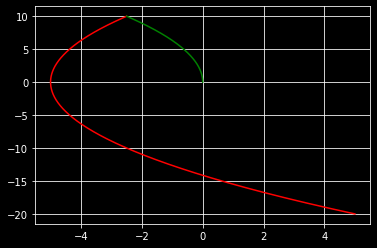

In [64]:
trajectory(5, -20, 20).visualize()

MovieWriter imagemagick unavailable; using Pillow instead.


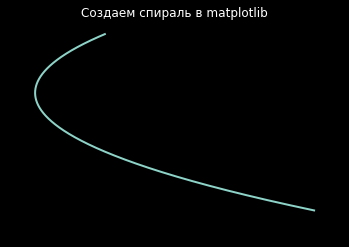

In [72]:
trajectory(5, -20, 20).animate()

In [40]:
def coil():
    plt.style.use('dark_background')
    
    fig = plt.figure()
    ax = plt.axes(xlim=(-50, 50), ylim=(-50, 50))
    line, = ax.plot([], [], lw=2)
    
    
    # Функция инициализации.
    def init():
        # создение пустого графа.
        line.set_data([], [])
        return line,
    
    
    xdata, ydata = [], []
    
    
    # функция анимации
    def animate(i):
        t = 0.1 * i
    
        # x, y данные на графике
        x = t * np.sin(t)
        y = t * np.cos(t)
    
        # добавление новых точек в список точек осей x, y
        xdata.append(x)
        ydata.append(y)
        line.set_data(xdata, ydata)
        return line,
    
    
    # Заголовок анимации
    plt.title('Создаем спираль в matplotlib')
    # Скрываем лишние данные
    plt.axis('off')
    
    # Вызов анимации.
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                frames=500, interval=20, blit=True)
    
    # Сохраняем анимацию как gif файл
    anim.save('coil.gif', writer='imagemagick')

MovieWriter imagemagick unavailable; using Pillow instead.


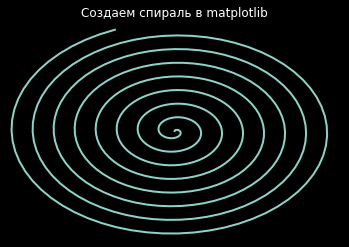

In [41]:
coil()